In [1]:
%run ../scripts/notebook_settings_lean.py
from glob import glob

First, run and test on chrX. The full_aut version is slightly updated, but should be quite similar.

In [2]:
rmaps_mik = glob("../smcpp_pyrho/steps/pyrho/Mikumi/*full_aut.rmap")
rmaps_mik, len(rmaps_mik)

(['../smcpp_pyrho/steps/pyrho/Mikumi/chr10_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr6_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr3_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr15_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr9_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr18_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chrX_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr1_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr17_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr12_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr4_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr13_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr5_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr16_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr19_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr20_full_aut.rmap',
  '../smcpp_pyrho/steps/pyrho/Mikumi/chr8_full_aut.rmap',
  '..

In [36]:
rmaps_mik = glob("../smcpp_pyrho/steps/pyrho/Mikumi/*full_aut.rmap")

df_l = []
for m in rmaps_mik:
    size = os.path.getsize(m)
    # Size check, as I had issues with the workflow.
    if size < 100:
        print(m)
        #os.remove(m)
    else:
        print(m.split("/")[-2])
        recomb_df = pd.read_csv(m, sep = "\t", names = ["start", "end", "recomb"])
        recomb_df["chrom"] = m.split("/")[-1].split(".")[0]
        recomb_df["population"] = m.split("/")[-2]
        df_l.append(recomb_df)
all_recombs = pd.concat(df_l)
all_recombs["window_size"] = all_recombs.end-all_recombs.start
all_recombs["genetic_distance"] = all_recombs.window_size*all_recombs.recomb

Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi
Mikumi


<AxesSubplot:xlabel='recomb', ylabel='Count'>

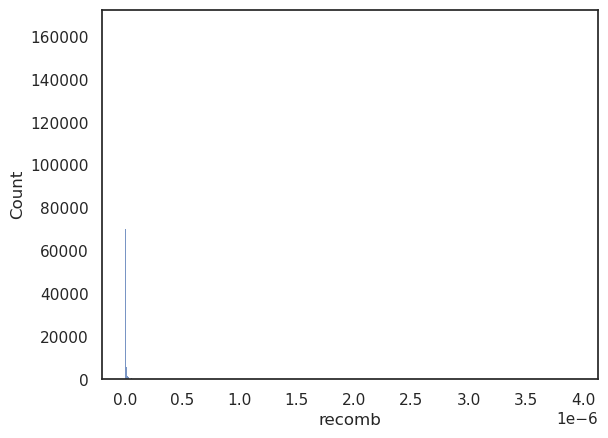

In [4]:
sns.histplot(data=all_recombs, x="recomb")

In [5]:
all_recombs.loc[all_recombs.recomb >= 0.000003]

,start,end,recomb,chrom,population,window_size,genetic_distance
1351839,130836681,130836685,0.000003,chr2_full_aut,Mikumi,4,0.000014
1351840,130836685,130836686,0.000003,chr2_full_aut,Mikumi,1,0.000003
1351841,130836686,130836688,0.000003,chr2_full_aut,Mikumi,2,0.000007
1351842,130836688,130836692,0.000003,chr2_full_aut,Mikumi,4,0.000014
1351843,130836692,130836693,0.000003,chr2_full_aut,Mikumi,1,0.000003
...,...,...,...,...,...,...,...
1844299,175278857,175278868,0.000003,chr2_full_aut,Mikumi,11,0.000037
1844300,175278868,175278869,0.000003,chr2_full_aut,Mikumi,1,0.000003
1844301,175278869,175278873,0.000003,chr2_full_aut,Mikumi,4,0.000014
291352,22025075,22025112,0.000004,chr19_full_aut,Mikumi,37,0.000145


In [6]:
total_size = 0
for chrom in all_recombs.chrom.unique():
    chrom_df = all_recombs.loc[(all_recombs.chrom == chrom)]
    print(chrom, chrom_df.window_size.sum(), chrom_df.genetic_distance.sum()*100)
    print("Relative rate is per mb:", 1000000*chrom_df.genetic_distance.sum()*100/chrom_df.window_size.sum())
    total_size += chrom_df.genetic_distance.sum()*100
print("Total size is:", total_size)

chr15_full_aut 108044840 75.28953643518992
Relative rate is per mb: 0.6968360213702933
chr1_full_aut 217458702 132.54907216163346
Relative rate is per mb: 0.6095367577501382
chr10_full_aut 91327938 80.94996273705823
Relative rate is per mb: 0.8863658209063938
chr4_full_aut 166072846 106.40322411395333
Relative rate is per mb: 0.6407021176354942
chrX_full_aut 143691465 30.5675277601788
Relative rate is per mb: 0.2127302951513425
chr18_full_aut 72525238 56.38542267444478
Relative rate is per mb: 0.7774593262892123
chr9_full_aut 125783368 88.84352465184831
Relative rate is per mb: 0.706321718558596
chr12_full_aut 128288813 79.7768276941868
Relative rate is per mb: 0.6218533465906089
chr6_full_aut 175396495 104.41997676191377
Relative rate is per mb: 0.5953367355597029
chr17_full_aut 91396575 71.9970840576523
Relative rate is per mb: 0.7877437864345825
chr3_full_aut 181338087 117.53130309299348
Relative rate is per mb: 0.6481335776581425
chr16_full_aut 74960203 67.75417017804276
Relative r

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


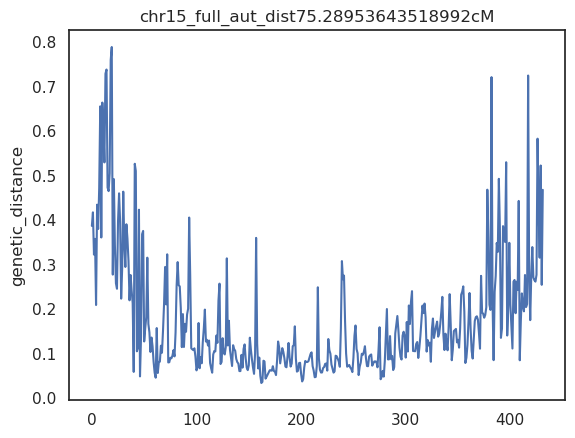

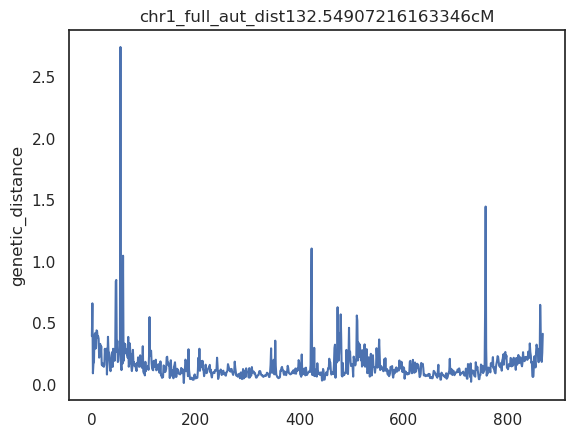

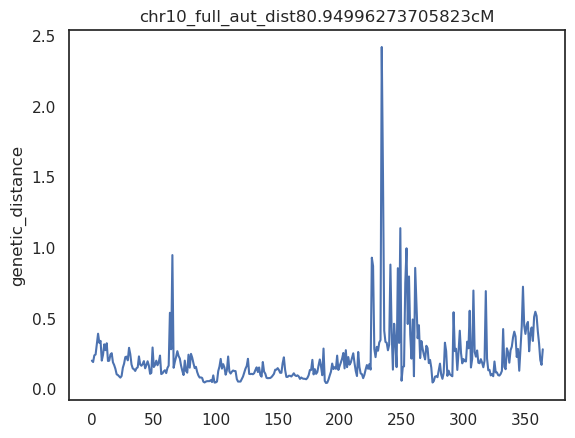

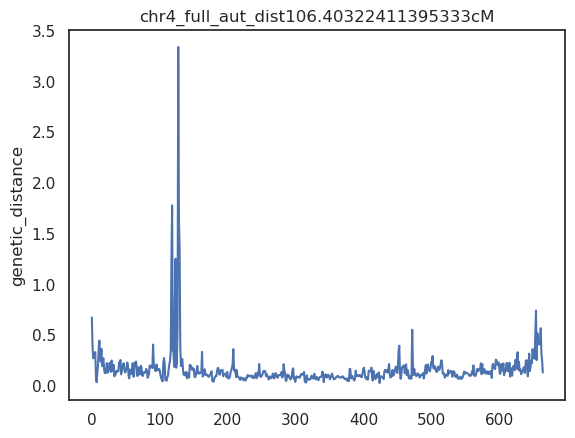

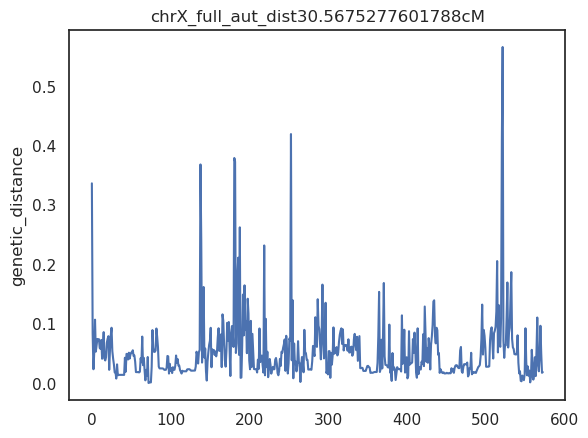

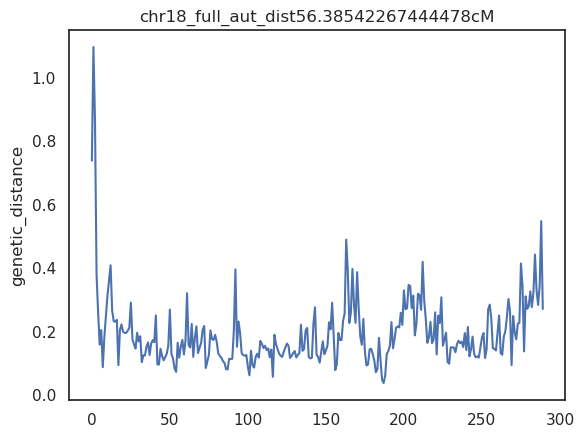

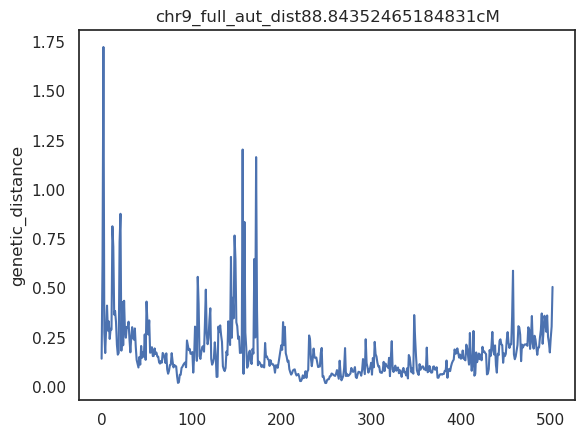

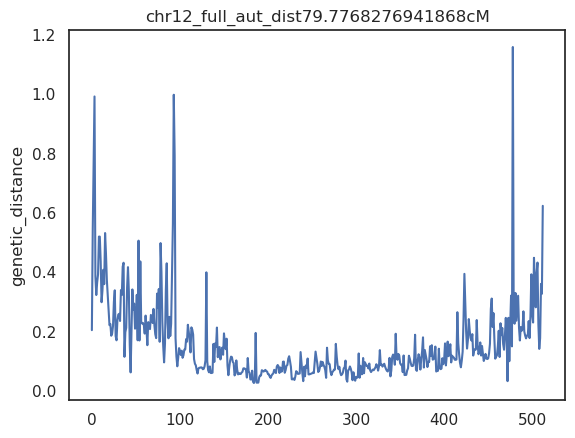

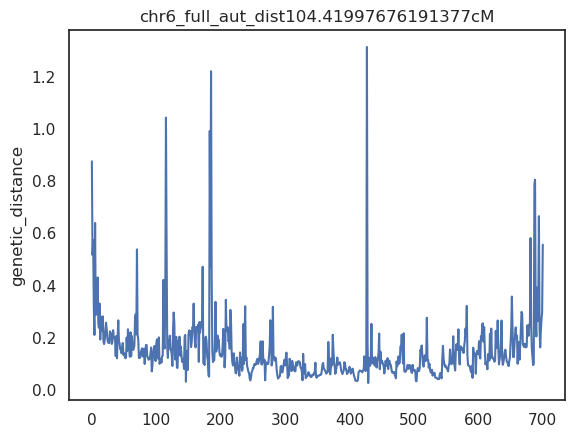

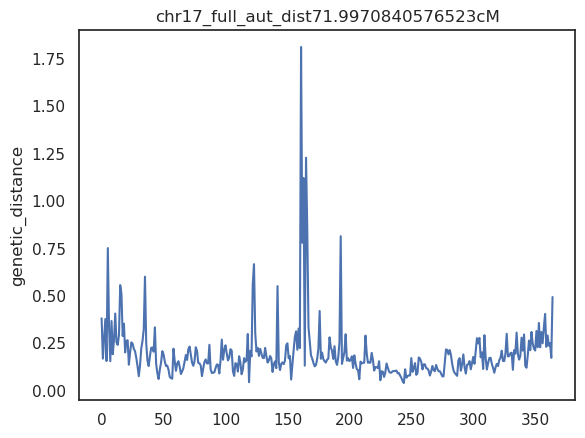

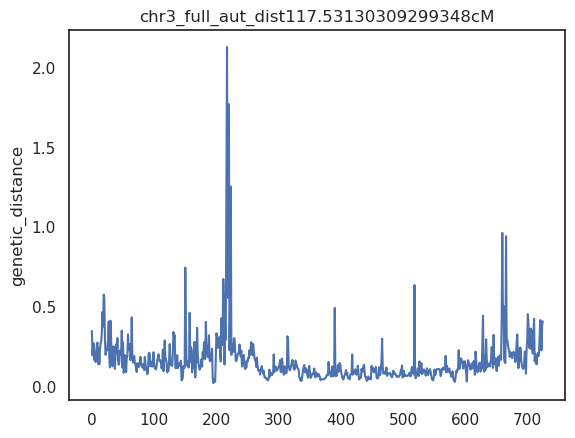

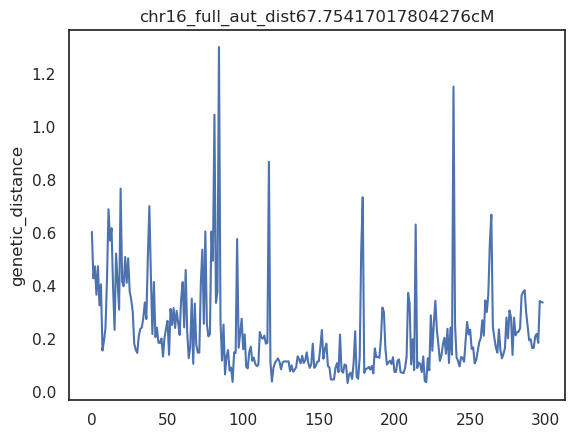

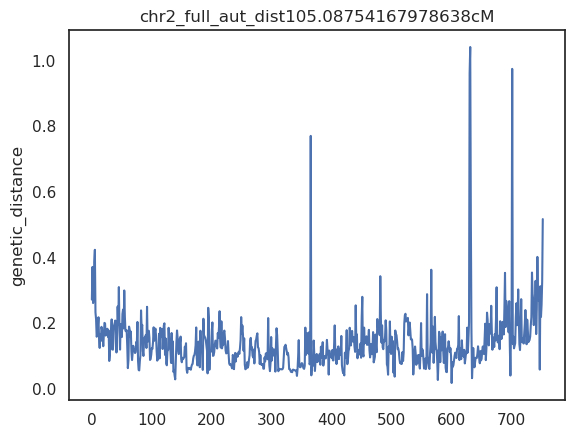

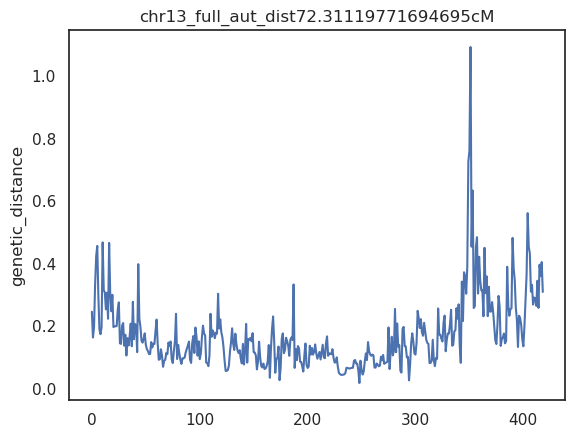

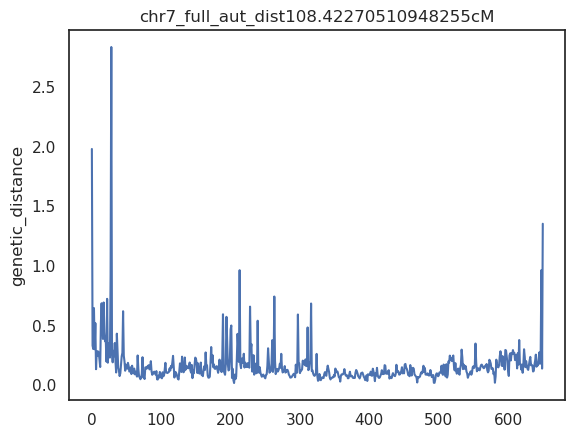

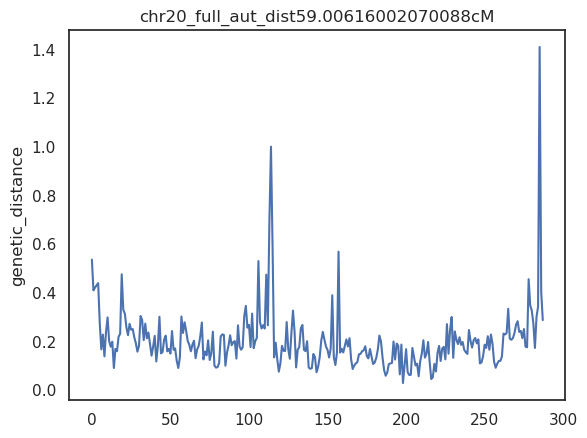

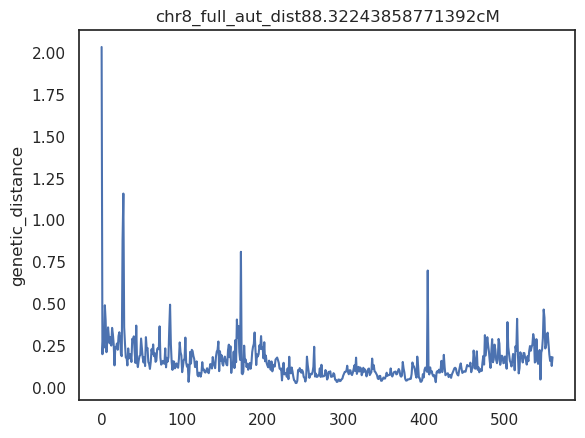

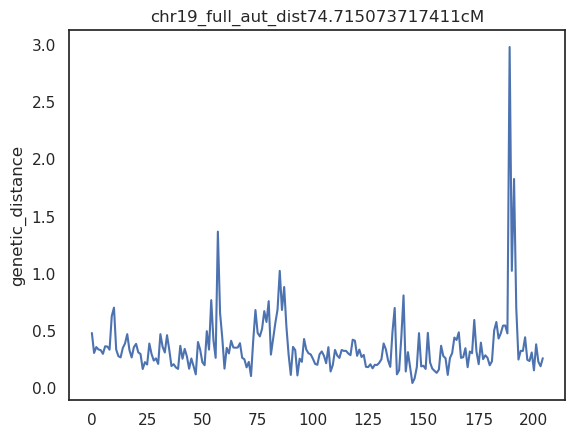

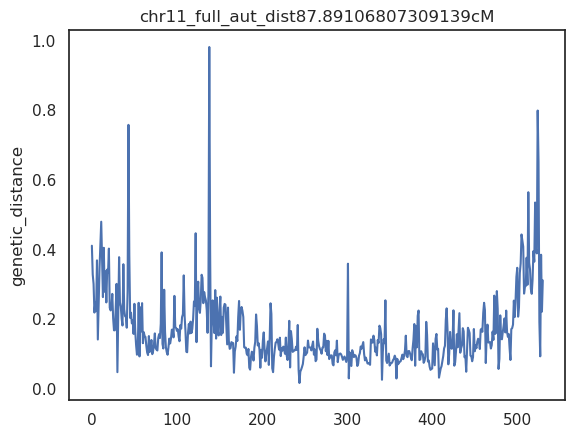

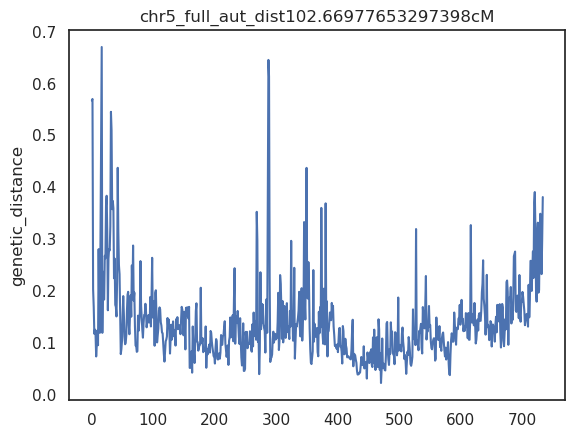

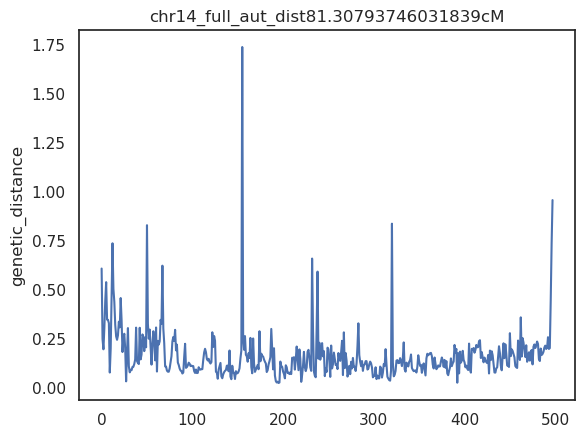

<Figure size 640x480 with 0 Axes>

In [7]:
window_size = 250000
for chrom in all_recombs.chrom.unique():
    chrom_df = all_recombs.loc[(all_recombs.chrom == chrom)]
    total_size = chrom_df.genetic_distance.sum()*100
    window_sums = chrom_df.groupby(pd.cut(chrom_df.start,np.arange\
                                          (0, chrom_df.start.max(), window_size))).sum().genetic_distance*100
    fig = sns.lineplot(y = window_sums,
                x = list(range(len(window_sums))))
    fig.set(title = "{}_dist{}cM".format(chrom, total_size))
    plt.figure()

The maps are quite similar, but the total implied size is roughly a factor 2 in difference. To handle this, we scale the maps. Total size of baboon autosomes are estimated to be 2,293cM for the autosomes.
We assume that the rate difference is similar in baboons as it is in humans.

In [8]:
#Human recomb maps.
recomb_path_human = "/home/eriks/faststorage/relate-clues/data/recombination_maps/*"

In [9]:
gen_maps_human = glob(recomb_path_human)
gen_maps_human

['/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr19_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr4_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr18_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr5_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr6_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr7_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr22_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr1_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr3_combined_b37.txt',
 '/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr20_combined_b37.txt',
 '/hom

In [10]:
aut_dist, aut_size = 0, 0
x_dist, x_size = 0, 0
for m in gen_maps_human:
    print(m)
    human_map = pd.read_csv(m, sep=" ")
    if m == "/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chrX_nonPAR_combined_b37.txt":
        x_dist = human_map.position.iloc[-1]-human_map.position.iloc[0]
        x_size = human_map["Genetic_Map(cM)"].iloc[-1]-human_map["Genetic_Map(cM)"].iloc[0]
    else:
        aut_dist += human_map.position.iloc[-1]-human_map.position.iloc[0]
        aut_size += human_map["Genetic_Map(cM)"].iloc[-1]-human_map["Genetic_Map(cM)"].iloc[0]

/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr19_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr4_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr18_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr5_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr6_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr7_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr22_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr1_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr3_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/recombination_maps/genetic_map_chr20_combined_b37.txt
/home/eriks/faststorage/relate-clues/data/reco

In [88]:
human_map

,position,COMBINED_rate(cM/Mb),Genetic_Map(cM)
0,20014981,0.000000,0.000000
1,20049831,0.103192,0.003596
2,20055634,0.103257,0.004195
3,20071673,0.111199,0.005979
4,20071765,0.120535,0.005990
...,...,...,...
90373,102398060,1.204060,150.840482
90374,102398213,1.282676,150.840678
90375,102398631,0.000000,150.840678
90376,102505839,0.000000,150.840678


In [11]:
x_size

180.983722648684

In [19]:
x_dist

152226021

The relative rate difference between autosomes and chrX in humans is:

In [12]:
(x_size/x_dist)/(aut_size/aut_dist)

0.9152883338331909

In [13]:
pd.read_csv(gen_maps_human[0], sep=" ").position.iloc[-1]

59097160

Scaling the chromosomes. Using sex-averaged estimate of 2,293 for autosome, and human relate rates to infer chrX size.

In [37]:
autosome_recombs = all_recombs.loc[all_recombs.chrom != "chrX_full_aut"]
x_recombs = all_recombs.loc[all_recombs.chrom == "chrX_full_aut"]

In [38]:
scaling_factor = 2293/(autosome_recombs.genetic_distance.sum()*100)
print(autosome_recombs.genetic_distance.sum()*100, scaling_factor)

1761.6340034573398 1.3016324591259105


In [39]:
autosome_recombs["scaled_distance"] = autosome_recombs.genetic_distance*scaling_factor*100
autosome_recombs["scaled_recomb"] = autosome_recombs.recomb*scaling_factor*100

/scratch/20530262/ipykernel_334030/4218335462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autosome_recombs["scaled_distance"] = autosome_recombs.genetic_distance*scaling_factor*100
/scratch/20530262/ipykernel_334030/4218335462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autosome_recombs["scaled_recomb"] = autosome_recombs.recomb*scaling_factor*100


In [40]:
average_auto=autosome_recombs.scaled_distance.sum()/autosome_recombs.window_size.sum()
average_auto*x_recombs.end.max()

127.03056924881979

In [41]:
x_scaling = average_auto*x_recombs.end.max()/(x_recombs.genetic_distance.sum()*100)
x_scaling

4.15573579405745

In [42]:
x_recombs["scaled_distance"] = x_recombs.genetic_distance*x_scaling*100
x_recombs["scaled_recomb"] = x_recombs.recomb*x_scaling*100

/scratch/20530262/ipykernel_334030/3123504619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_recombs["scaled_distance"] = x_recombs.genetic_distance*x_scaling*100
/scratch/20530262/ipykernel_334030/3123504619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_recombs["scaled_recomb"] = x_recombs.recomb*x_scaling*100


In [43]:
scaled_recomb_df = pd.concat([autosome_recombs, x_recombs])

In [44]:
x_recombs.scaled_distance.sum()

127.03056924881982

In [45]:
scaled_recomb_df

,start,end,recomb,chrom,population,window_size,genetic_distance,scaled_distance,scaled_recomb
0,1329,1362,2.049078e-08,chr10_full_aut,Mikumi,33,6.761958e-07,0.000088,0.000003
1,1362,1381,2.049078e-08,chr10_full_aut,Mikumi,19,3.893249e-07,0.000051,0.000003
2,1381,1426,2.049078e-08,chr10_full_aut,Mikumi,45,9.220852e-07,0.000120,0.000003
3,1426,1435,2.049078e-08,chr10_full_aut,Mikumi,9,1.844170e-07,0.000024,0.000003
4,1435,1558,2.049078e-08,chr10_full_aut,Mikumi,123,2.520366e-06,0.000328,0.000003
...,...,...,...,...,...,...,...,...,...
579843,143689325,143689397,2.975802e-08,chrX_full_aut,Mikumi,72,2.142578e-06,0.000890,0.000012
579844,143689397,143689425,2.975802e-08,chrX_full_aut,Mikumi,28,8.332246e-07,0.000346,0.000012
579845,143689425,143691422,2.975802e-08,chrX_full_aut,Mikumi,1997,5.942677e-05,0.024696,0.000012
579846,143691422,143691434,2.975802e-08,chrX_full_aut,Mikumi,12,3.570963e-07,0.000148,0.000012


In [46]:
scaled_recomb_df.scaled_distance.sum(), sum(scaled_recomb_df.scaled_recomb*scaled_recomb_df.window_size)

(2420.0305692488287, 2420.030569249317)

Transforming and saving

In [47]:
import allel
import zarr

In [66]:
df_l = []
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
chrom_sizes = []
for chrom in chromosome_numbers:
    zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr{}"
    #Opening the zarr data
    callset = zarr.open_group(zarr_dir.format(chrom), mode="r")
    pos_array = callset["variants/POS"][:]
    chrom_df = scaled_recomb_df.loc[scaled_recomb_df.chrom == "chr"+chrom+"_full_aut"]
    print("Number of pyrho pos and SNP", len(chrom_df), len(pos_array))
    extended_recomb = []
    i = 0
    max_i = len(chrom_df)-1
    for pos in pos_array:
        if i == max_i:
            extended_recomb.append(chrom_df["scaled_recomb"][i-1])
        elif pos >= chrom_df["start"][i]:
            i += 1
            extended_recomb.append(chrom_df["scaled_recomb"][max(i-1, 0)])
        else:
            extended_recomb.append(chrom_df["scaled_recomb"][max(i-1, 0)])
    pos_l = np.append(0, pos_array[1:]-pos_array[:-1])
    df = (pd.DataFrame(data={"position": pos_array, "COMBINED_rate(cM/Mb)": extended_recomb, "pos_l": pos_l}))
    df["chromosome"] = "chr{}".format(chrom)
    df["Genetic_Map(cM)"] = (df["pos_l"]*df["COMBINED_rate(cM/Mb)"]).cumsum()
    chrom_size = df["Genetic_Map(cM)"].max()
    print("Size of chromosome: ", chrom_size)
    print("Size of chromosome calculated with rates: ", (df["COMBINED_rate(cM/Mb)"]*df["pos_l"]).sum())
    chrom_sizes.append(chrom_size)
    df.to_csv("/home/eriks/baboondiversity/data/PG_panu3_recombination_map/mikumi_pyrho_genetic_map_chr{}.txt".format(chrom),
              sep=" ", index=False, columns=["chromosome", "position", "COMBINED_rate(cM/Mb)", "Genetic_Map(cM)"])
    df_l.append(df)
    print("Finished ", chrom)

Number of pyrho pos and SNP 2208980 7250857
Size of chromosome:  172.60279511019746
Size of chromosome calculated with rates:  172.60279511024265
Finished  1
Number of pyrho pos and SNP 2004750 6391700
Size of chromosome:  136.76394472002815
Size of chromosome calculated with rates:  136.76394471998353
Finished  2
Number of pyrho pos and SNP 1996471 6303321
Size of chromosome:  152.90690201522645
Size of chromosome calculated with rates:  152.90690201529702
Finished  3
Number of pyrho pos and SNP 1899000 5846808
Size of chromosome:  138.49217448923972
Size of chromosome calculated with rates:  138.49217448920825
Finished  4
Number of pyrho pos and SNP 2123547 6672340
Size of chromosome:  133.60216436556007
Size of chromosome calculated with rates:  133.6021643655582
Finished  5
Number of pyrho pos and SNP 1906595 6101232
Size of chromosome:  136.1427591705869
Size of chromosome calculated with rates:  136.14275917062983
Finished  6
Number of pyrho pos and SNP 1716996 5497845
Size of ch

In [67]:
df

,position,COMBINED_rate(cM/Mb),pos_l,chromosome,Genetic_Map(cM)
0,37,0.000010,0,chrX,0.000000
1,57,0.000010,20,chrX,0.000205
2,157,0.000010,100,chrX,0.001231
3,170,0.000010,13,chrX,0.001365
4,216,0.000010,46,chrX,0.001837
...,...,...,...,...,...
2923207,143691509,0.000012,6,chrX,127.257096
2923208,143691526,0.000012,17,chrX,127.257306
2923209,143691548,0.000012,22,chrX,127.257578
2923210,143691549,0.000012,1,chrX,127.257591


In [68]:
(df["COMBINED_rate(cM/Mb)"]*df["pos_l"]).sum()

127.25780105874416

Quick check of genetic maps

In [5]:
df = pd.read_csv("/home/eriks/baboondiversity/data/PG_panu3_recombination_map/mikumi_pyrho_genetic_map_chr20.txt",
                sep = " ")

In [23]:
df["Genetic_Map(cM)"].is_monotonic_increasing

True

In [24]:
df[["chromosome", "position", "Genetic_Map(cM)"]]

,chromosome,position,Genetic_Map(cM)
0,chr20,19,0.000170
1,chr20,73,0.000338
2,chr20,126,0.000407
3,chr20,148,0.000410
4,chr20,149,0.000451
...,...,...,...
2792460,chr20,72046365,76.804863
2792461,chr20,72046419,76.804926
2792462,chr20,72046439,76.805399
2792463,chr20,72046588,76.811016


In [31]:
df

,chromosome,position,COMBINED_rate(cM/Mb),Genetic_Map(cM)
0,chr20,19,0.000003,0.000170
1,chr20,73,0.000003,0.000338
2,chr20,126,0.000003,0.000407
3,chr20,148,0.000003,0.000410
4,chr20,149,0.000003,0.000451
...,...,...,...,...
2792460,chr20,72046365,0.000003,76.804863
2792461,chr20,72046419,0.000003,76.804926
2792462,chr20,72046439,0.000003,76.805399
2792463,chr20,72046588,0.000003,76.811016


In [33]:
(df["position"]*df["COMBINED_rate(cM/Mb)"]).cumsum()

0          5.997399e-05
1          2.904004e-04
2          6.881227e-04
3          1.155289e-03
4          1.625611e-03
               ...     
2792460    1.184745e+08
2792461    1.184747e+08
2792462    1.184750e+08
2792463    1.184752e+08
2792464    1.184754e+08
Length: 2792465, dtype: float64

In [29]:
sorted_df = df.sort_values(by = "Genetic_Map(cM)")

In [30]:
sorted_df.loc[sorted_df["Genetic_Map(cM)"] != df["Genetic_Map(cM)"]]

,chromosome,position,COMBINED_rate(cM/Mb),Genetic_Map(cM)


In [25]:
len(df["Genetic_Map(cM)"].unique())

2792464

In [26]:
print(df[df.duplicated()].drop_duplicates())

Empty DataFrame
Columns: [chromosome, position, COMBINED_rate(cM/Mb), Genetic_Map(cM)]
Index: []
